### Week 1
- EDA
- Vectorize the words, quick logisitic regression on positive comments

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GoEmo_df = pd.read_csv('GoEmotions_cleaned.csv')

In [3]:
GoEmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56873 entries, 0 to 56872
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              56873 non-null  object
 1   text            56873 non-null  object
 2   subreddit       56873 non-null  object
 3   admiration      56873 non-null  int64 
 4   amusement       56873 non-null  int64 
 5   anger           56873 non-null  int64 
 6   annoyance       56873 non-null  int64 
 7   approval        56873 non-null  int64 
 8   caring          56873 non-null  int64 
 9   confusion       56873 non-null  int64 
 10  curiosity       56873 non-null  int64 
 11  desire          56873 non-null  int64 
 12  disappointment  56873 non-null  int64 
 13  disapproval     56873 non-null  int64 
 14  disgust         56873 non-null  int64 
 15  embarrassment   56873 non-null  int64 
 16  excitement      56873 non-null  int64 
 17  fear            56873 non-null  int64 
 18  gratit

In [ ]:
GoEmo_df

### Bag of words,
- just explore positive sentiment
- bag of words, remove stop words
- count?

In [4]:
simple_data = GoEmo_df.iloc[:, [1, 31]].copy()

In [5]:
simple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56873 entries, 0 to 56872
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      56873 non-null  object
 1   positive  56873 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 888.8+ KB


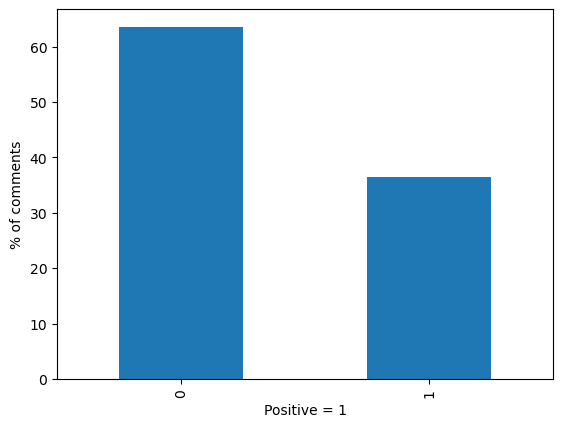

In [6]:

plt.figure()
simple_data['positive'].value_counts(normalize=True).mul(100).round(1).plot(kind ='bar')
plt.xlabel('Positive = 1')
plt.ylabel('% of comments')
plt.show()

In [7]:
# store simplified data in X and y
X = simple_data['text']
y = simple_data['positive']

In [8]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train.shape

(42654,)

In [10]:
X_test.shape

(14219,)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english",
                             min_df= 5)
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<42654x6083 sparse matrix of type '<class 'numpy.int64'>'
	with 211265 stored elements in Compressed Sparse Row format>

c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


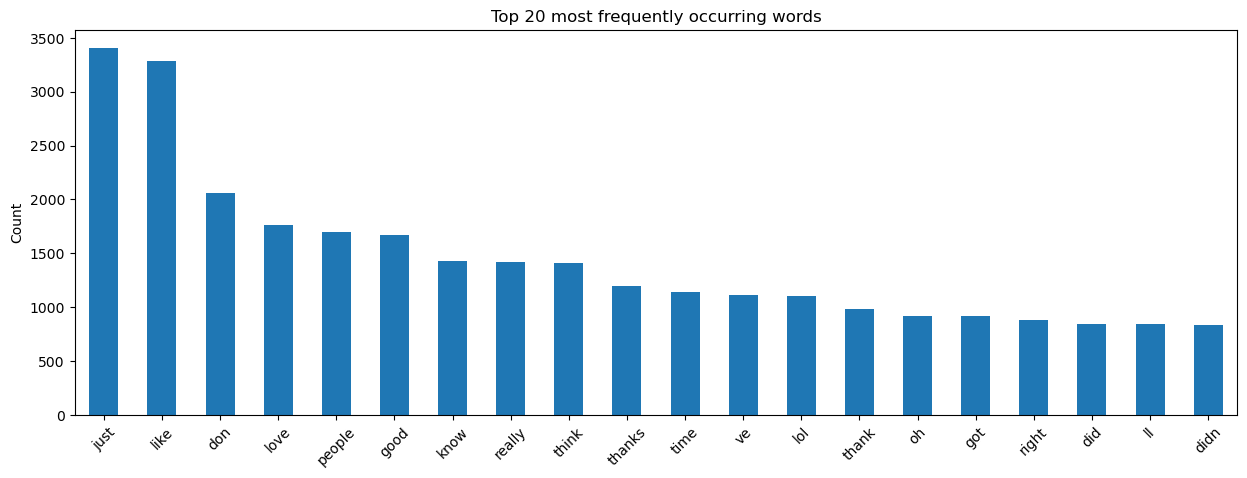

In [30]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8302386646035542
Test score: 0.8243899008369083


c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


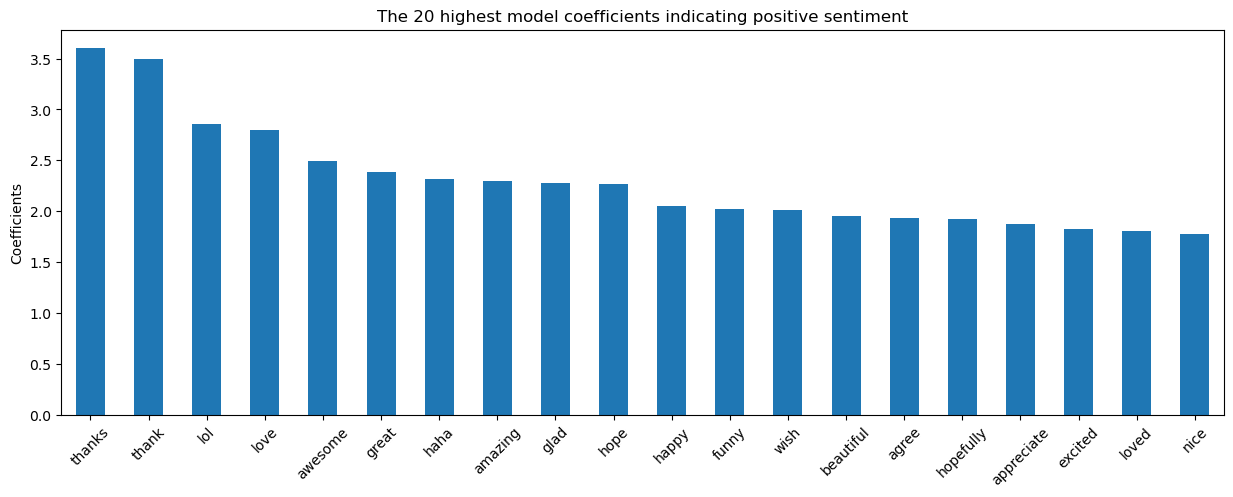

In [32]:
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

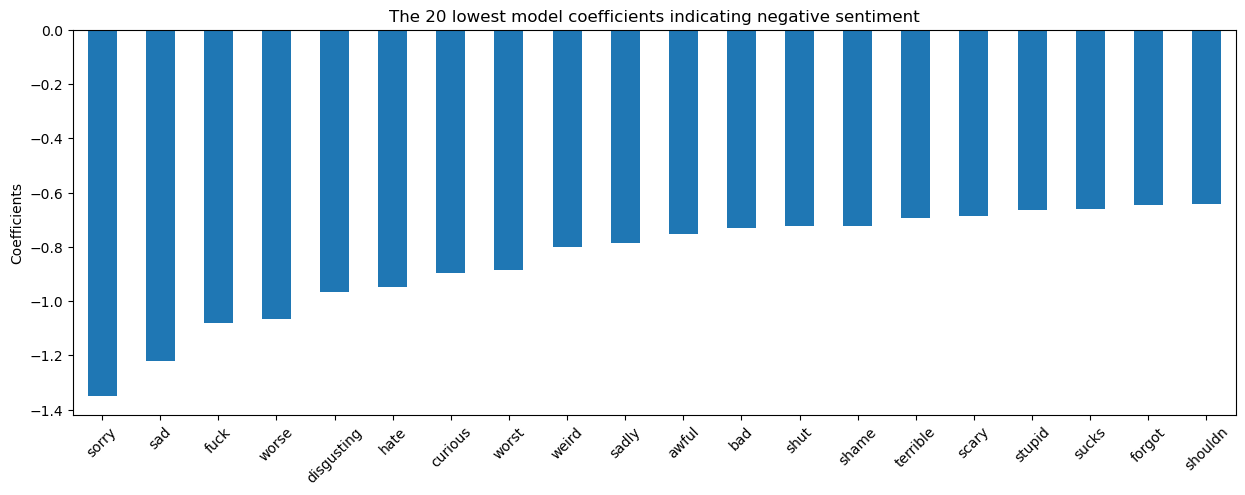

In [33]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

## TF-IDF vectorization
- 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english", min_df=5)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(42654, 6083)

c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


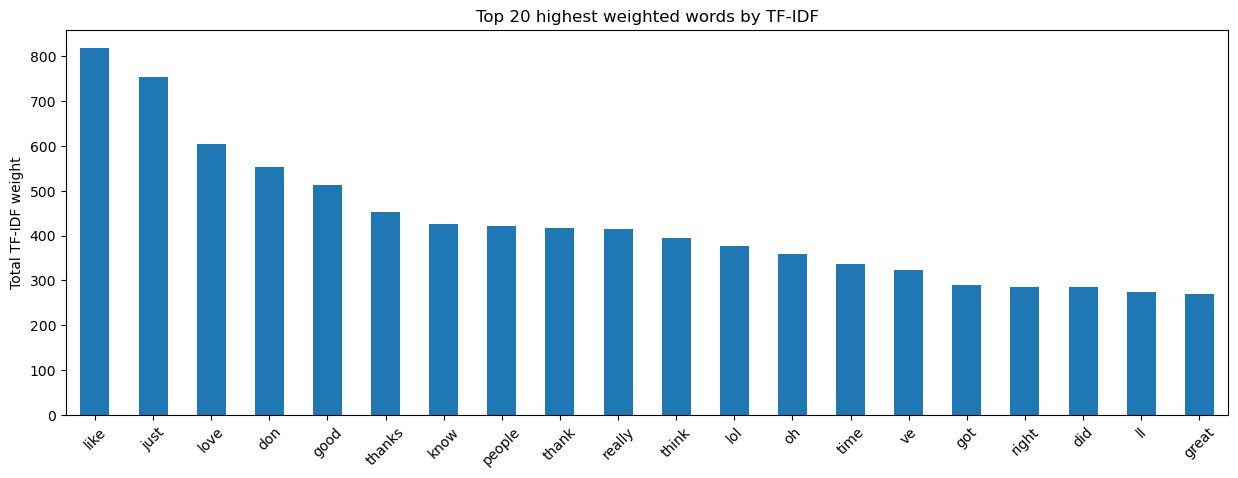

In [15]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()